<div style="text-align: left; background-color:black; font-family: Trebuchet MS; color:#70e000; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: black solid;"> Bank Customer Churn Prediction </div>

<a id="1"></a>
## <b>1 <span style='color:#70e000'>||</span> Introduction</b>


<div style="border-radius:10px;
            border: black solid;
            adding: 15px;
            background-color:#000000;
            font-size:120%;
            text-aling: left">
<h3 style:'border:0; border-radius: 15px; color: black'><center> Steps we will go through:</center></h3>

_________________________________________________________________________
    
Predicting customer churn in banking is crucial for maintaining customer loyalty, reducing revenue loss, and optimizing marketing and retention efforts. By identifying at-risk customers beforehand, banks can take proactive measures to retain them, thereby improving customer satisfaction and profitability.
    
we will walk through this steps:
    
1. Load the data<br>
2. EDA and analyze the data for more insights
3. Clean and Preprocess the data<br>
4. Preprocess the data transform the texts to numerical. a format which computer understand<br>
5. Split the data into train and test<br>
6. Scale the data<br>
7. Train the model <br>
8. Evaluate the model<br>
9. Build a Predictive Function<br>
10. Save the model

<a id="2"></a>
## <b>2 <span style='color:#70e000'>||</span>Import Necessaries</b>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
import missingno as msno

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from joblib import dump

<a id="3"></a>
## <b>3 <span style='color:#70e000'>||</span> EDA</b>

<a id="3.1"></a>
### <b>3.1 <span style='color:#70e000'>||</span> Define data path and dataset name</b>

In [ ]:
data_path = 'Churn_Modelling.csv'
ds_name = 'Bank Customer Churn'

In [ ]:
df = pd.read_csv(data_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a id="3.2"></a>
### <b>3.2 <span style='color:#70e000'>||</span> Check the shape of the dataset</b>

In [ ]:
def ds_shape(df, ds_name='df'):
    print(f"The {ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} Columns")

ds_shape(df, ds_name)

The Bank Customer Churn dataset has 10000 rows and 14 Columns


<a id="3.3"></a>
### <b>3.3 <span style='color:#70e000'>||</span> Display information about the dataset</b>

In [ ]:
def ds_info(df, ds_name='df'):
    print(f"The {ds_name} dataset info:\n")
    print(df.info())

ds_info(df, ds_name)

The Bank Customer Churn dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


<a id="3.4"></a>
### <b>3.4 <span style='color:#70e000'>||</span> Data Cleaning</b>

<a id="3.4.1"></a>
#### <b>3.4.1 <span style='color:#70e000'>||</span>Drop dummy columns</b>

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a id="3.4.2"></a>
#### <b>3.4.2 <span style='color:#70e000'>||</span>Handle Null Valus</b>

In [ ]:
def check_null(df, ds_name='df'):
    print(f"Null Values in each col in the {ds_name} dataset:\n")
    print(df.isnull().sum())

check_null(df, ds_name)

Null Values in each col in the Bank Customer Churn dataset:

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


<a id="3.4.3"></a>
### <b>3.4.3 <span style='color:#70e000'>||</span> Visualize the Null Values</b>

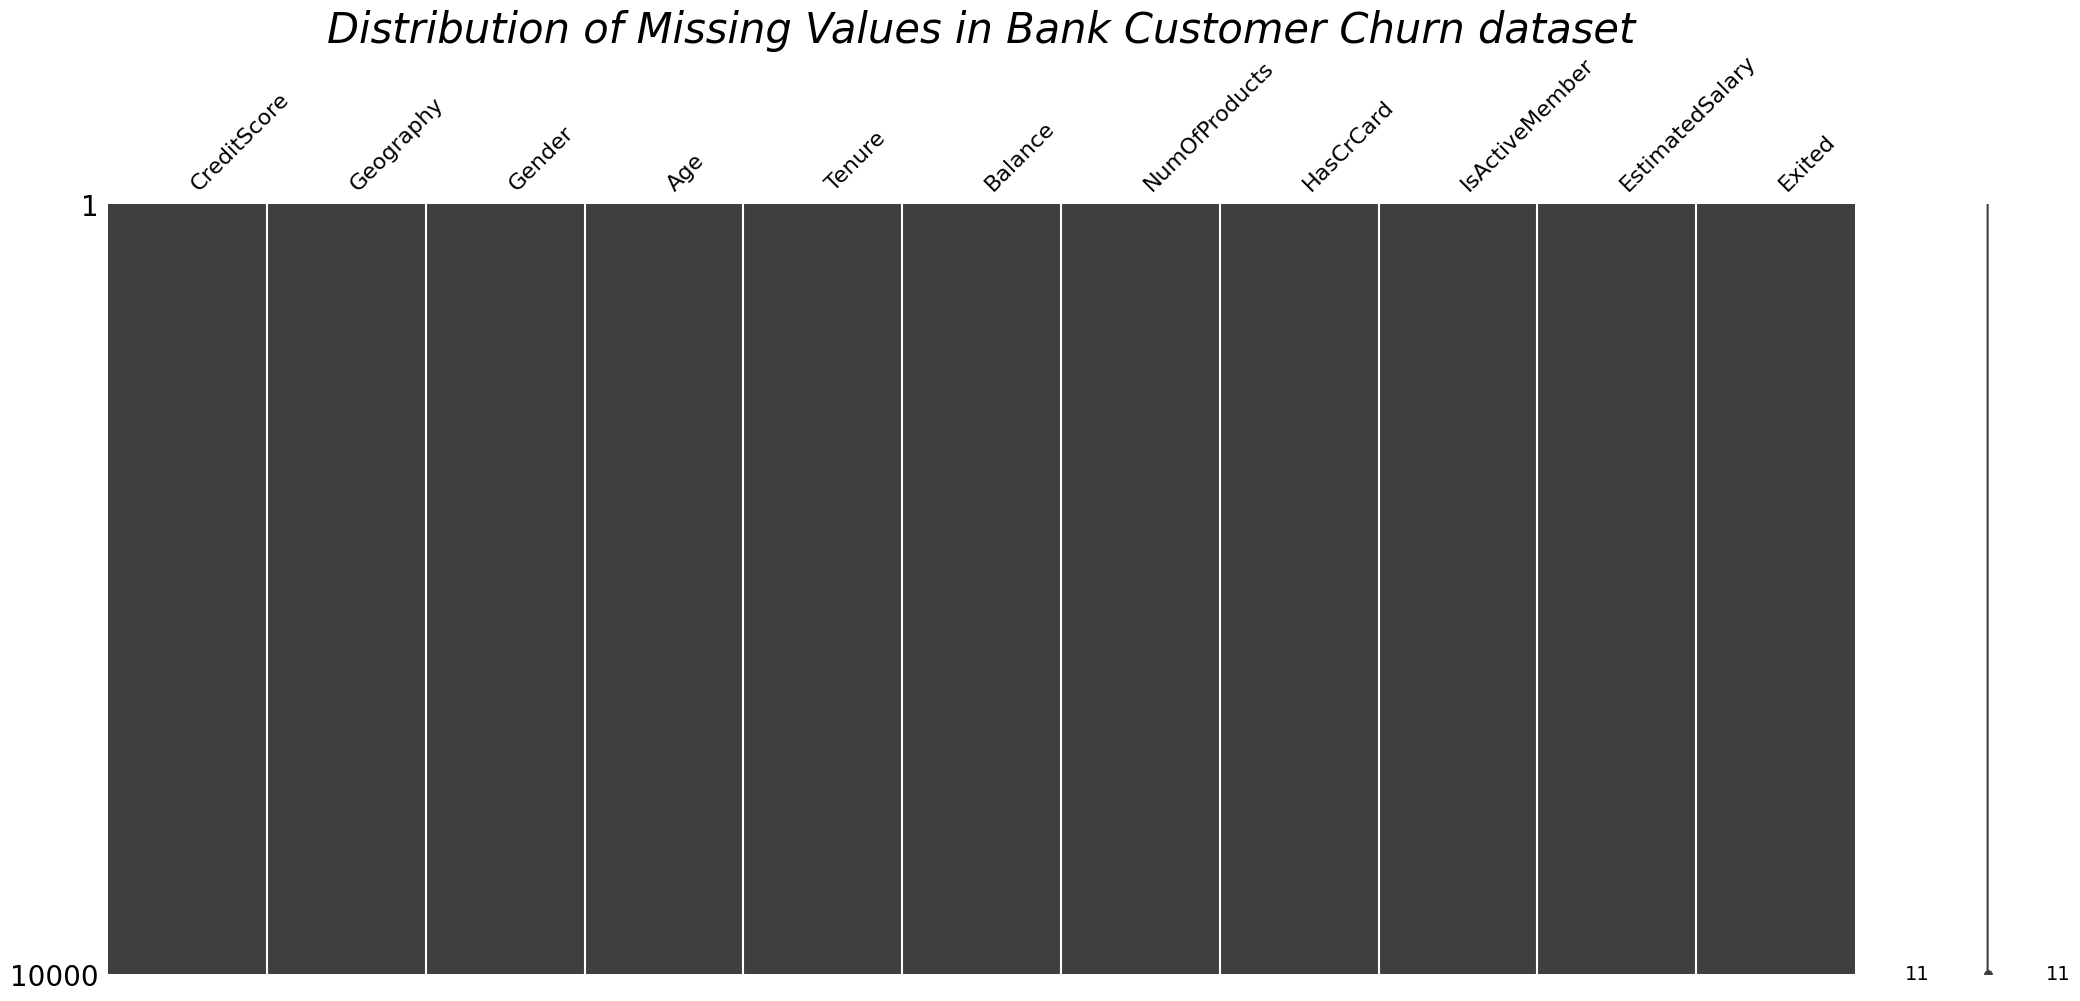

In [ ]:
def plot_miss_vals(df, ds_name="df"):
    msno.matrix(df)
    plt.title(f'Distribution of Missing Values in {ds_name} dataset', fontsize=30, fontstyle='oblique')
    plt.show()

plot_miss_vals(df, ds_name)

<a id="3.5"></a>
### <b>3.5 <span style='color:#70e000'>||</span>Display Unique val in each col</b>

In [ ]:
def uni_vals(df, ds_name='df'):

    print(f"The number of unique values in each column in {ds_name} dataset:\n")
    print(df.nunique())

uni_vals(df, ds_name)

The number of unique values in each column in Bank Customer Churn dataset:

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


<a id="3.6"></a>
### <b>3.6 <span style='color:#70e000'>||</span> Plot Categorical Features Distrbution</b>

In [ ]:
cat_features = []
cont_features = []
looping = len(df.nunique())

for i in range(looping):

    if df.nunique().values[i] <= 25:
        cat_features.append(df.nunique().index[i])
    else:
        cont_features.append(df.nunique().index[i])

In [ ]:
print(f"Categorical Features are: {cat_features}\n")
print(f"Continous Features are: {cont_features}")

Categorical Features are: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

Continous Features are: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


In [ ]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)


colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

In [ ]:
for cat_feature in cat_features:
    cat_summary_with_graph(df, cat_feature)

<a id="3.7"></a>
### <b>3.7 <span style='color:#70e000'>||</span> Plot Outliers</b>

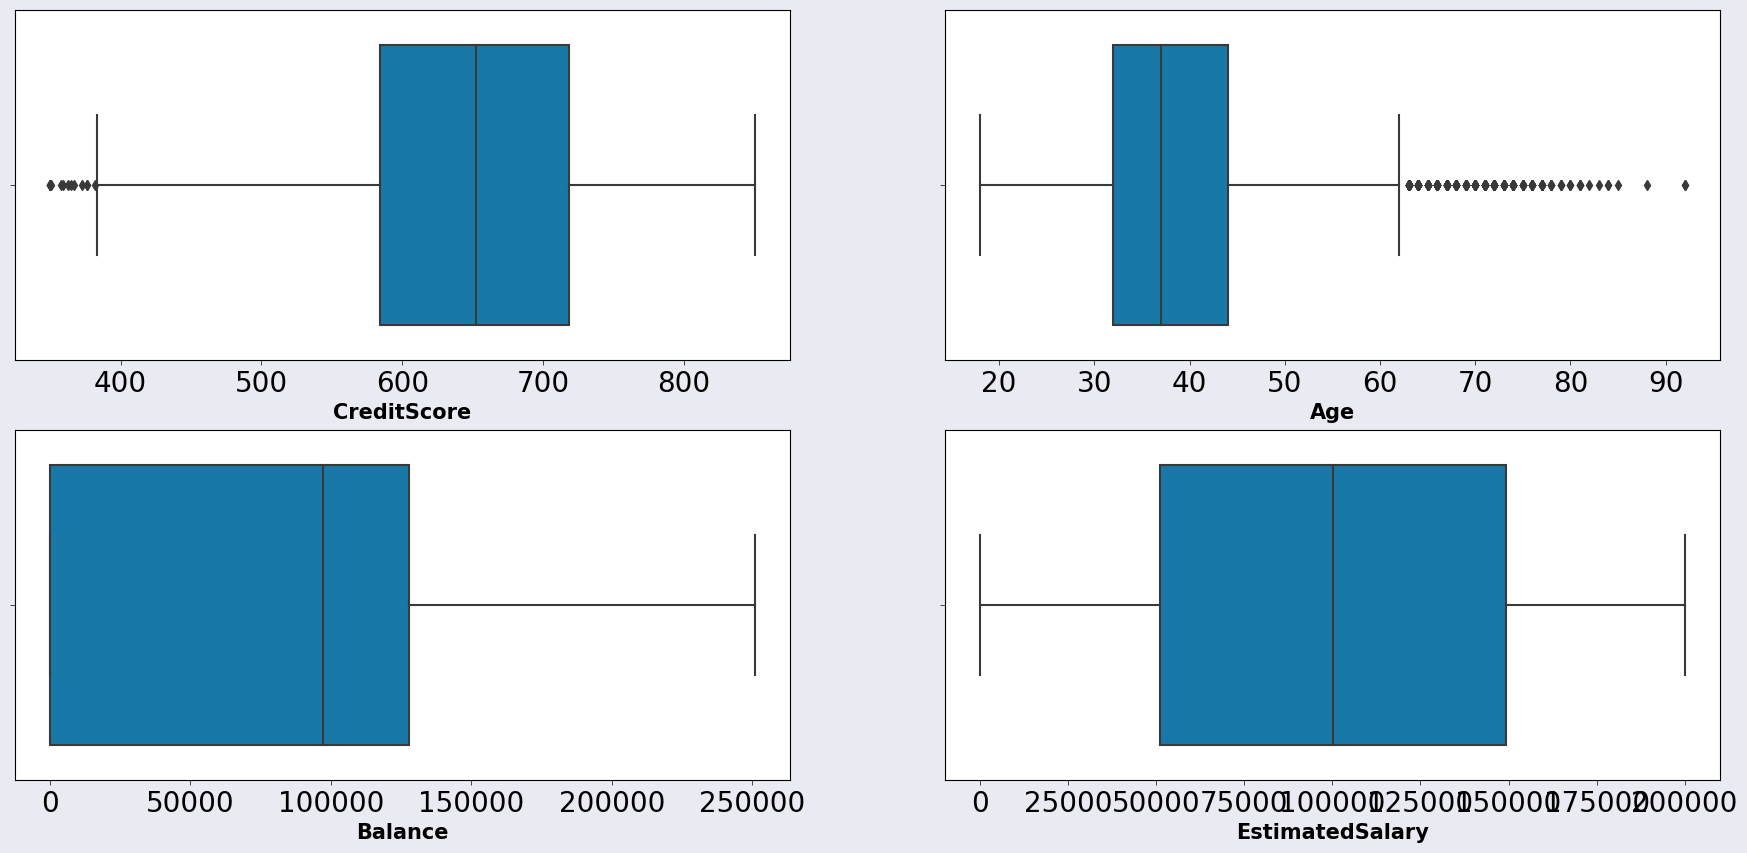

In [ ]:
ncols = 2
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.boxplot(x=df[col], ax=axes[r, c], palette='winter')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=15, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

<a id="4"></a>
## <b>4 <span style='color:#70e000'>||</span> Data Preprocessing</b>

In [ ]:
# one hot encoding
# to avoid dummy variable trap

df= pd.get_dummies(df, columns= ['Geography', 'Gender'], drop_first=True, dtype=np.int8)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<a id="5"></a>
## <b>5 <span style='color:#70e000'>||</span> Correlation Analysis</b>

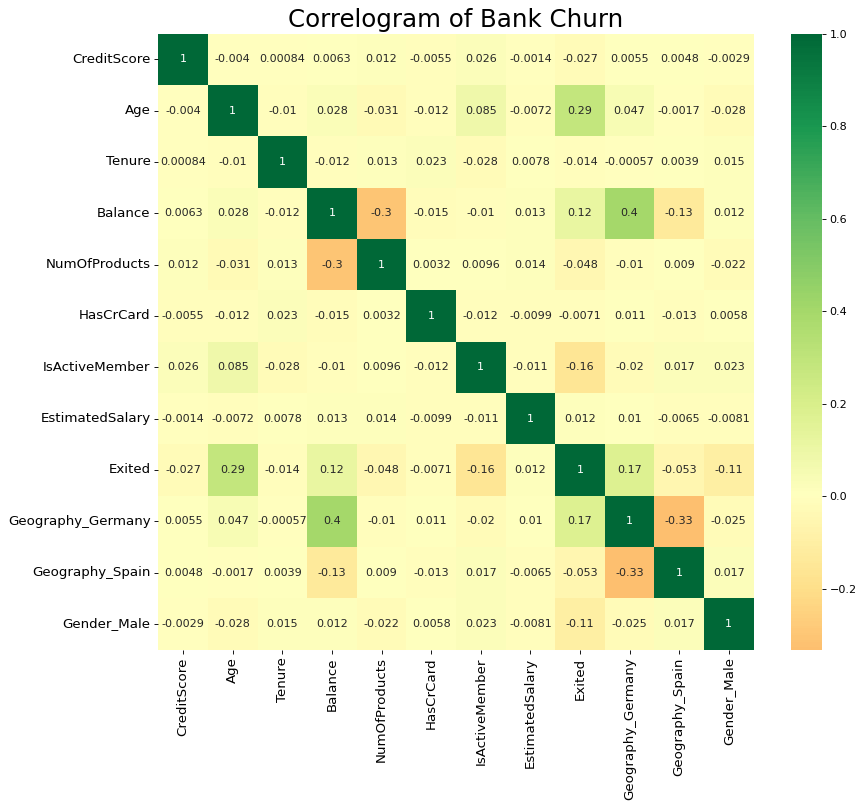

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations

plt.title('Correlogram of Bank Churn', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<a id="6"></a>
## <b>6 <span style='color:#70e000'>||</span> Split the data into train and test datasets</b>

In [ ]:
X = df.drop('Exited', axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
y = df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=123,
                                                    test_size=0.2,
                                                    shuffle=True)


In [ ]:
print(f"Training dataset has {X_train.shape[0]} Examples")
print(f"Testing dataset has {X_test.shape[0]} Examples")

Training dataset has 8000 Examples
Testing dataset has 2000 Examples


<a id="7"></a>
## <b>7 <span style='color:#70e000'>||</span>Feature Scaling</b>

In [ ]:
scaler = StandardScaler()
features = list(X_train.columns)

for col in features:
    X_train[col] = scaler.fit_transform(X_train[col].to_numpy().reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].to_numpy().reshape(-1,1))

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9385,0.382227,0.487923,1.033751,0.308125,0.825039,0.645897,0.973355,-1.712869,1.740172,-0.574271,0.908195
2155,0.101876,-0.379067,0.341382,0.394675,-0.914174,0.645897,-1.027375,-1.409809,-0.574656,-0.574271,-1.101086
768,0.351077,0.198926,-1.043358,0.699392,0.825039,-1.548234,-1.027375,0.349622,-0.574656,1.741338,0.908195
6082,0.776796,0.102594,1.033751,0.448857,-0.914174,0.645897,-1.027375,-0.664364,1.740172,-0.574271,0.908195
2926,-1.455629,2.318235,1.033751,-1.220239,0.825039,0.645897,0.973355,0.262719,-0.574656,-0.574271,0.908195


<a id="8"></a>
## <b>8 <span style='color:#70e000'>||</span>Data Modeling and Evaluation</b>

<a id="8.1"></a>
### <b>8.1 <span style='color:#70e000'>||</span>Train KNN</b>

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

<a id="8.2"></a>
### <b>8.2 <span style='color:#70e000'>||</span>Evaluate Accuarcy of KNN</b>

In [ ]:
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"The Accuarcy of KNN {knn_accuracy*100:.2f}%")

The Accuarcy of KNN 82.00%


<a id="8.3"></a>
### <b>8.3 <span style='color:#70e000'>||</span>Train SVM</b>

In [ ]:
svm_classifier = SVC(C=2.0,kernel='rbf')
svm_classifier.fit(X_train, y_train)

SVC(C=2.0)

<a id="8.4"></a>
### <b>8.4 <span style='color:#70e000'>||</span>Evaluate Accuarcy of SVM</b>

In [ ]:
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"The Accuarcy of SVM {svm_accuracy*100:.2f}%")

The Accuarcy of SVM 86.00%


<a id="8.5"></a>
### <b>8.5 <span style='color:#70e000'>||</span>Train Xgboost</b>

In [ ]:
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<a id="8.6"></a>
### <b>8.6 <span style='color:#70e000'>||</span>Evaluate Accuarcy of Xgboost</b>

In [ ]:
xgboost_predictions = xgboost_classifier.predict(X_test)
xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)

print(f"The Accuarcy of xgboost {xgboost_accuracy*100:.2f}%")

The Accuarcy of xgboost 85.75%


<a id="8.7"></a>
### <b>8.7 <span style='color:#70e000'>||</span>Train Random Forest</b>

In [ ]:
randomForest_classifier = RandomForestClassifier()
randomForest_classifier.fit(X_train, y_train)

RandomForestClassifier()

<a id="8.8"></a>
### <b>8.8 <span style='color:#70e000'>||</span>Evaluate Random Forest</b>

In [ ]:
randomForest_predictions = randomForest_classifier.predict(X_test)
randomForest_accuracy = accuracy_score(y_test, randomForest_predictions)

print(f"The Accuarcy of Random Forest {randomForest_accuracy*100:.2f}%")

The Accuarcy of Random Forest 87.00%




```
# This is formatted as code
```

<a id="8.9"></a>
### <b>8.9 <span style='color:#70e000'>||</span>Train ANN</b>

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create and train the ANN model
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann_classifier.fit(X_train, y_train)


MLPClassifier(max_iter=500, random_state=42)

In [ ]:
# Evaluate accuracy of the ANN
ann_predictions = ann_classifier.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predictions)

print(f"The Accuracy of the ANN: {ann_accuracy*100:.2f}%")

The Accuracy of the ANN: 85.25%


<a id="8.10"></a>
### <b>8.10 <span style='color:#70e000'>||</span>Confusion Matrix</b>

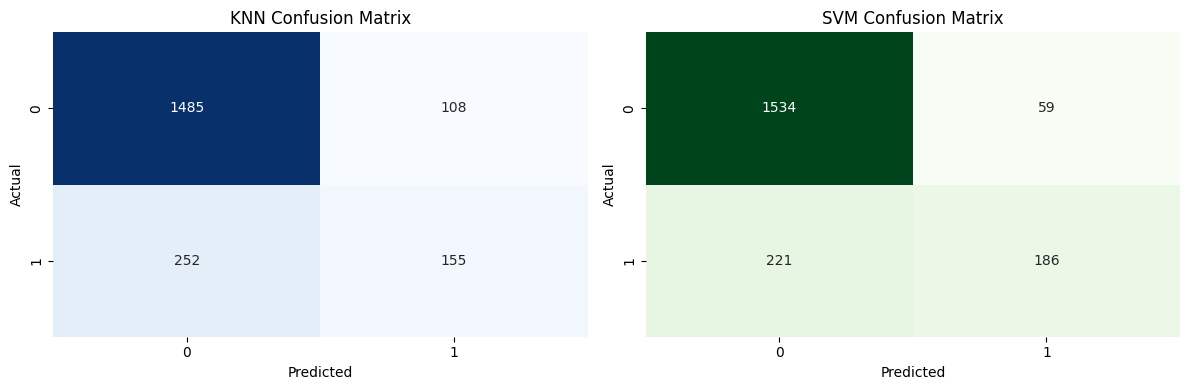

In [ ]:
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(knn_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(svm_conf_matrix, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

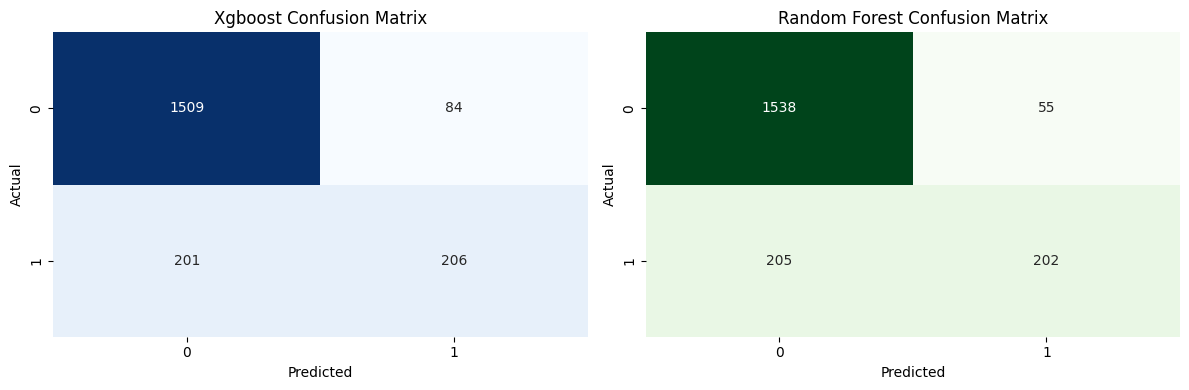

In [ ]:
xgboost_conf_matrix = confusion_matrix(y_test, xgboost_predictions)
randomForest_conf_matrix = confusion_matrix(y_test, randomForest_predictions)

# Plot confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(xgboost_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Xgboost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(randomForest_conf_matrix, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

The Accuracy of the ANN: 85.25%
Confusion Matrix for ANN:
[[1495   98]
 [ 197  210]]


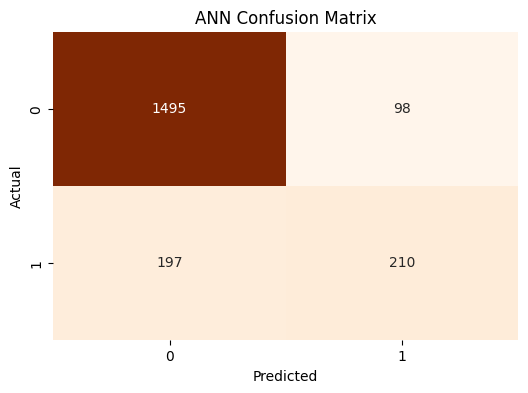

In [ ]:
# Calculate confusion matrix for ANN
ann_conf_matrix = confusion_matrix(y_test, ann_predictions)

# Print accuracy and confusion matrix for ANN
print(f"The Accuracy of the ANN: {ann_accuracy*100:.2f}%")
print("Confusion Matrix for ANN:")
print(ann_conf_matrix)

# Plot confusion matrix for ANN
plt.figure(figsize=(6, 4))
sns.heatmap(ann_conf_matrix, annot=True, cmap='Oranges', fmt='d', cbar=False)
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<a id="8.11"></a>
### <b>8.11 <span style='color:#70e000'>||</span>Comparison of KNN,SVM,Xgboost and RandomForest Accuarcies</b>

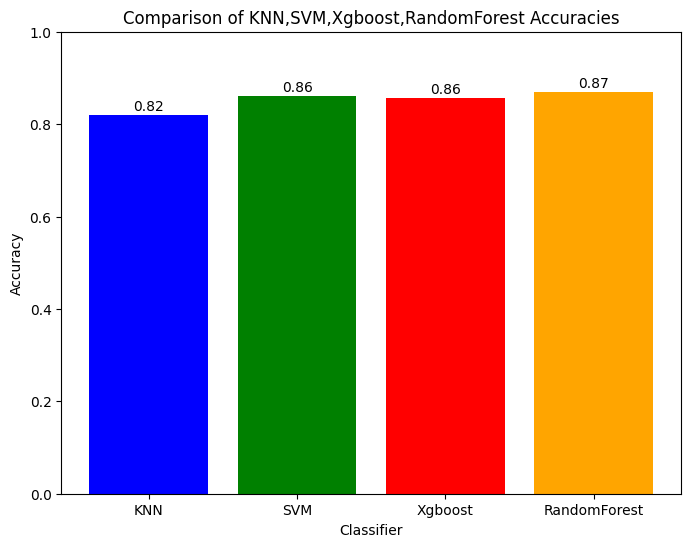

In [ ]:
classifiers = ['KNN', 'SVM', 'Xgboost', 'RandomForest']
accuracies = [knn_accuracy, svm_accuracy,xgboost_accuracy, randomForest_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.title('Comparison of KNN,SVM,Xgboost,RandomForest Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Setting y-axis limit for better visualization
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')

plt.show()

<a id="8.12"></a>
### <b>8.12 <span style='color:#70e000'>||</span>Comparison of KNN,SVM,Xgboost , RandomForest & ANN Accuarcies</b>

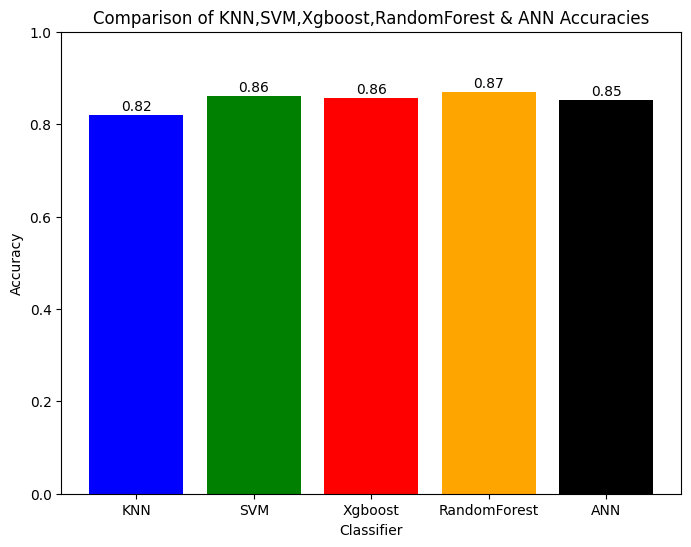

In [ ]:
classifiers = ['KNN', 'SVM', 'Xgboost', 'RandomForest' , 'ANN']
accuracies = [knn_accuracy, svm_accuracy,xgboost_accuracy, randomForest_accuracy, ann_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red', 'orange', 'black'])
plt.title('Comparison of KNN,SVM,Xgboost,RandomForest & ANN Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Setting y-axis limit for better visualization
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')

plt.show()

<a id="9"></a>
## <b>9 <span style='color:#70e000'>||</span>Predict</b>

In [ ]:
def prediction_fun(cs, age, tenure, balance, num_of_products, has_card, am, es, geo, gender, cols):
    geo_spain = 0
    geo_germany = 0
    gender_male = 0

    if geo == 'Germany':
        geo_germany = 1
    elif geo == 'Spain':
        geo_spain = 1

    if gender == 'Male':
        gender_male = 1

    data_points = pd.DataFrame(columns = cols)
    vals = [cs, age, tenure, balance, num_of_products, has_card, am, es, geo_germany, geo_spain, gender_male]
    data_points.loc[len(data_points.index)] = vals

    scaler = StandardScaler()
    features = list(X_train.columns)

    for col in features:
        data_points[col] = scaler.fit_transform(data_points[col].to_numpy().reshape(-1,1))

    predict = svm_classifier.predict(data_points)[0]

    if predict == 0:

        print("This Customer is more likely to Stay")

    else:

        print("This Customer is more likely to exit the bank")



In [ ]:
cs = 815
age = 39
tenure = 6
balance = 0
num_of_products= 1
has_card = 1
am = 1
es = 85167.88
geo = 'Spain'
gender = 'Female'
cols = X_train.columns
prediction_fun(cs, age, tenure, balance, num_of_products, has_card, am, es, geo, gender, cols)

This Customer is more likely to Stay


<a id="10"></a>
## <b>10 <span style='color:#70e000'>||</span>Save Model</b>

In [ ]:
dump(randomForest_classifier, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
dump(ann_classifier, 'artificial_neural_net_model.joblib')

['artificial_neural_net_model.joblib']

In [ ]:
import os

# Print the current working directory
print(os.getcwd())


/content


In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

# List all files in the current working directory
files_in_directory = os.listdir(current_directory)

# Print the list of files
print("Files in the current directory:")
for file in files_in_directory:
    print(file)


Files in the current directory:
.config
random_forest_model.joblib
Churn_Modelling.csv
artificial_neural_net_model.joblib
sample_data


In [ ]:
from joblib import load

# Load the ANN model
ann_model = load('artificial_neural_net_model.joblib')

# Now you can use ann_model for making predictions or other tasks.

In [ ]:
# Assuming X_new is your new data
#predictions = ann_model.predict(X_new)

In [ ]:
# Open and read the contents of the file
with open('artificial_neural_net_model.joblib', 'rb') as file:
    file_contents = file.read()

# Display the contents (assuming it's text or binary data)
print(file_contents)


b'\x80\x04\x95\xed\x02\x00\x00\x00\x00\x00\x00\x8c-sklearn.neural_network._multilayer_perceptron\x94\x8c\rMLPClassifier\x94\x93\x94)\x81\x94}\x94(\x8c\nactivation\x94\x8c\x04relu\x94\x8c\x06solver\x94\x8c\x04adam\x94\x8c\x05alpha\x94G?\x1a6\xe2\xeb\x1cC-\x8c\nbatch_size\x94\x8c\x04auto\x94\x8c\rlearning_rate\x94\x8c\x08constant\x94\x8c\x12learning_rate_init\x94G?PbM\xd2\xf1\xa9\xfc\x8c\x07power_t\x94G?\xe0\x00\x00\x00\x00\x00\x00\x8c\x08max_iter\x94M\xf4\x01\x8c\x04loss\x94\x8c\x08log_loss\x94\x8c\x12hidden_layer_sizes\x94Kd\x85\x94\x8c\x07shuffle\x94\x88\x8c\x0crandom_state\x94K*\x8c\x03tol\x94G?\x1a6\xe2\xeb\x1cC-\x8c\x07verbose\x94\x89\x8c\nwarm_start\x94\x89\x8c\x08momentum\x94G?\xec\xcc\xcc\xcc\xcc\xcc\xcd\x8c\x12nesterovs_momentum\x94\x88\x8c\x0eearly_stopping\x94\x89\x8c\x13validation_fraction\x94G?\xb9\x99\x99\x99\x99\x99\x9a\x8c\x06beta_1\x94G?\xec\xcc\xcc\xcc\xcc\xcc\xcd\x8c\x06beta_2\x94G?\xef\xf7\xce\xd9\x16\x87+\x8c\x07epsilon\x94G>Ey\x8e\xe20\x8c:\x8c\x10n_iter_no_change\

The Accuracy of SVM pipeline: 80.35%
Confusion Matrix for SVM pipeline:
[[1607    0]
 [ 393    0]]


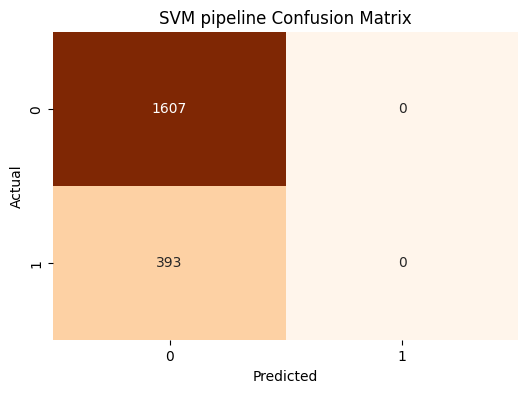

The Accuracy of KNN pipeline: 83.00%
Confusion Matrix for KNN pipeline:
[[1514   93]
 [ 247  146]]


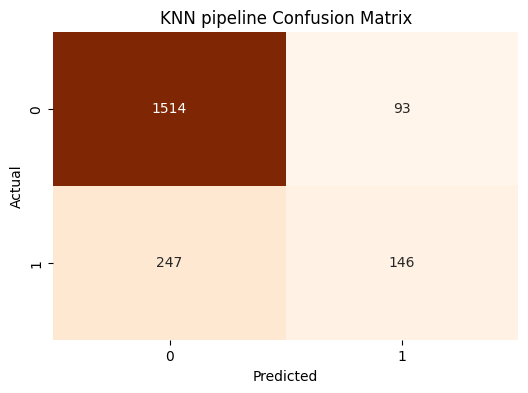

The Accuracy of ANN pipeline: 86.00%
Confusion Matrix for ANN pipeline:
[[1523   84]
 [ 196  197]]


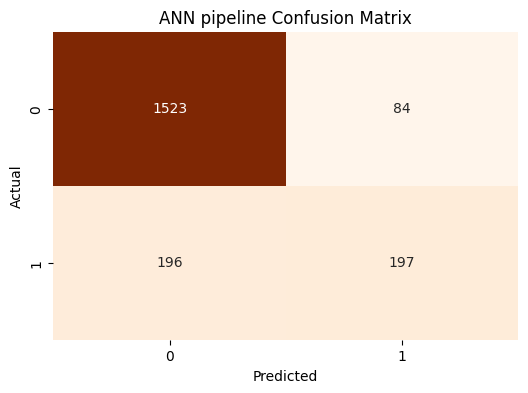

The Accuracy of XGBoost pipeline: 86.40%
Confusion Matrix for XGBoost pipeline:
[[1526   81]
 [ 191  202]]


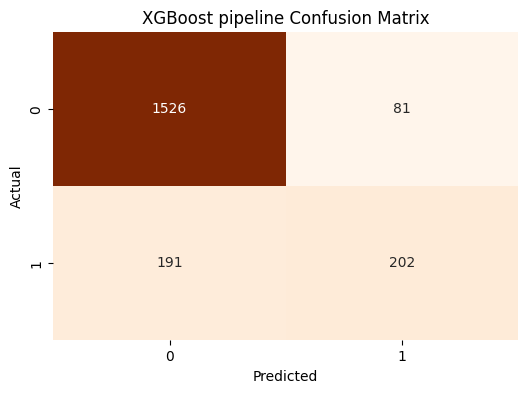

The Accuracy of RandomForest pipeline: 86.60%
Confusion Matrix for RandomForest pipeline:
[[1549   58]
 [ 210  183]]


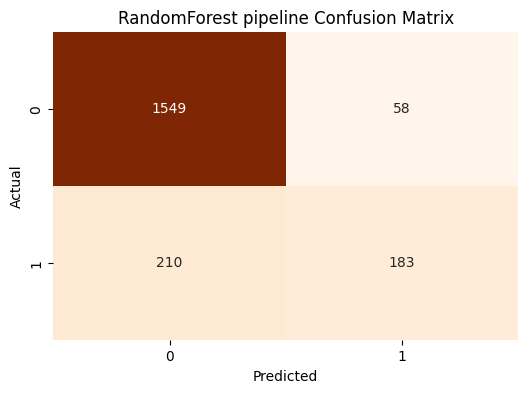

In [ ]:
from sklearn.pipeline import Pipeline
from joblib import dump, load

# Define the models
svm_model = SVC(kernel='linear', C=1)
knn_model = KNeighborsClassifier(n_neighbors=5)
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
xgboost_model = XGBClassifier()
random_forest_model = RandomForestClassifier(n_estimators=100)

# Create a pipeline for each model
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm_model)
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', knn_model)
])

ann_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ann', ann_model)
])

xgboost_pipeline = Pipeline([
    ('xgboost', xgboost_model)
])

random_forest_pipeline = Pipeline([
    ('random_forest', random_forest_model)
])

# Train and evaluate each model in the pipeline
pipelines = {
    'SVM': svm_pipeline,
    'KNN': knn_pipeline,
    'ANN': ann_pipeline,
    'XGBoost': xgboost_pipeline,
    'RandomForest': random_forest_pipeline
}

for model_name, pipeline in pipelines.items():
    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    predictions = pipeline.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"The Accuracy of {model_name} pipeline: {accuracy*100:.2f}%")

    # Calculate and print confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    print(f"Confusion Matrix for {model_name} pipeline:\n{conf_matrix}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Oranges', fmt='d', cbar=False)
    plt.title(f'{model_name} pipeline Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Save the model
    dump(pipeline, f'{model_name.lower()}_model.joblib')


In [ ]:
# Assuming X, y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
svm_model = SVC(kernel='linear', C=1)
knn_model = KNeighborsClassifier(n_neighbors=5)
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
xgboost_model = XGBClassifier()
random_forest_model = RandomForestClassifier(n_estimators=100)

# Create a pipeline for each model
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm_model)
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', knn_model)
])

ann_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ann', ann_model)
])

xgboost_pipeline = Pipeline([
    ('xgboost', xgboost_model)
])

random_forest_pipeline = Pipeline([
    ('random_forest', random_forest_model)
])

# Train each model individually
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
ann_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Apply each pipeline on the test set and evaluate accuracy
pipelines = {
    'SVM': svm_pipeline,
    'KNN': knn_pipeline,
    'ANN': ann_pipeline,
    'XGBoost': xgboost_pipeline,
    'RandomForest': random_forest_pipeline
}

for model_name, pipeline in pipelines.items():
    # Make predictions
    predictions = pipeline.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"The Accuracy of {model_name}: {accuracy*100:.2f}%")

    # Calculate and print confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    print(f"Confusion Matrix for {model_name}:\n{conf_matrix}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Oranges', fmt='d', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Save the model
    dump(pipeline, f'{model_name.lower()}_model.joblib')


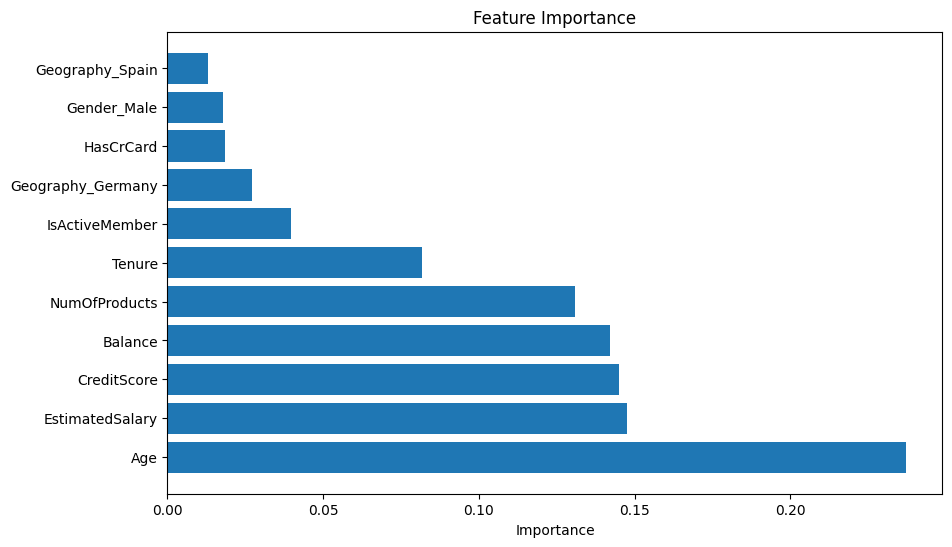

In [ ]:
# Extract features and labels
X = df.drop(['Exited'], axis=1)
y = df['Exited']

# Train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


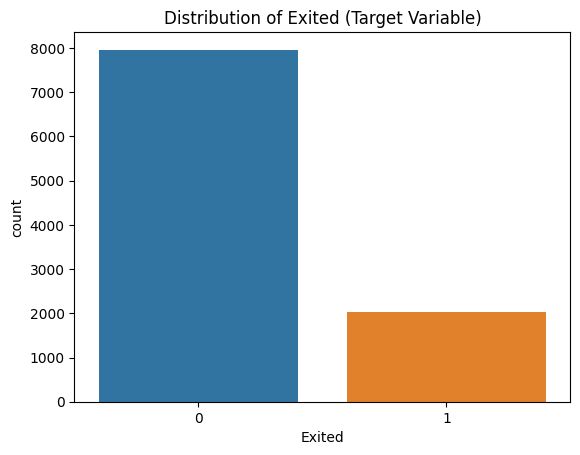

In [ ]:

sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited (Target Variable)')
plt.show()


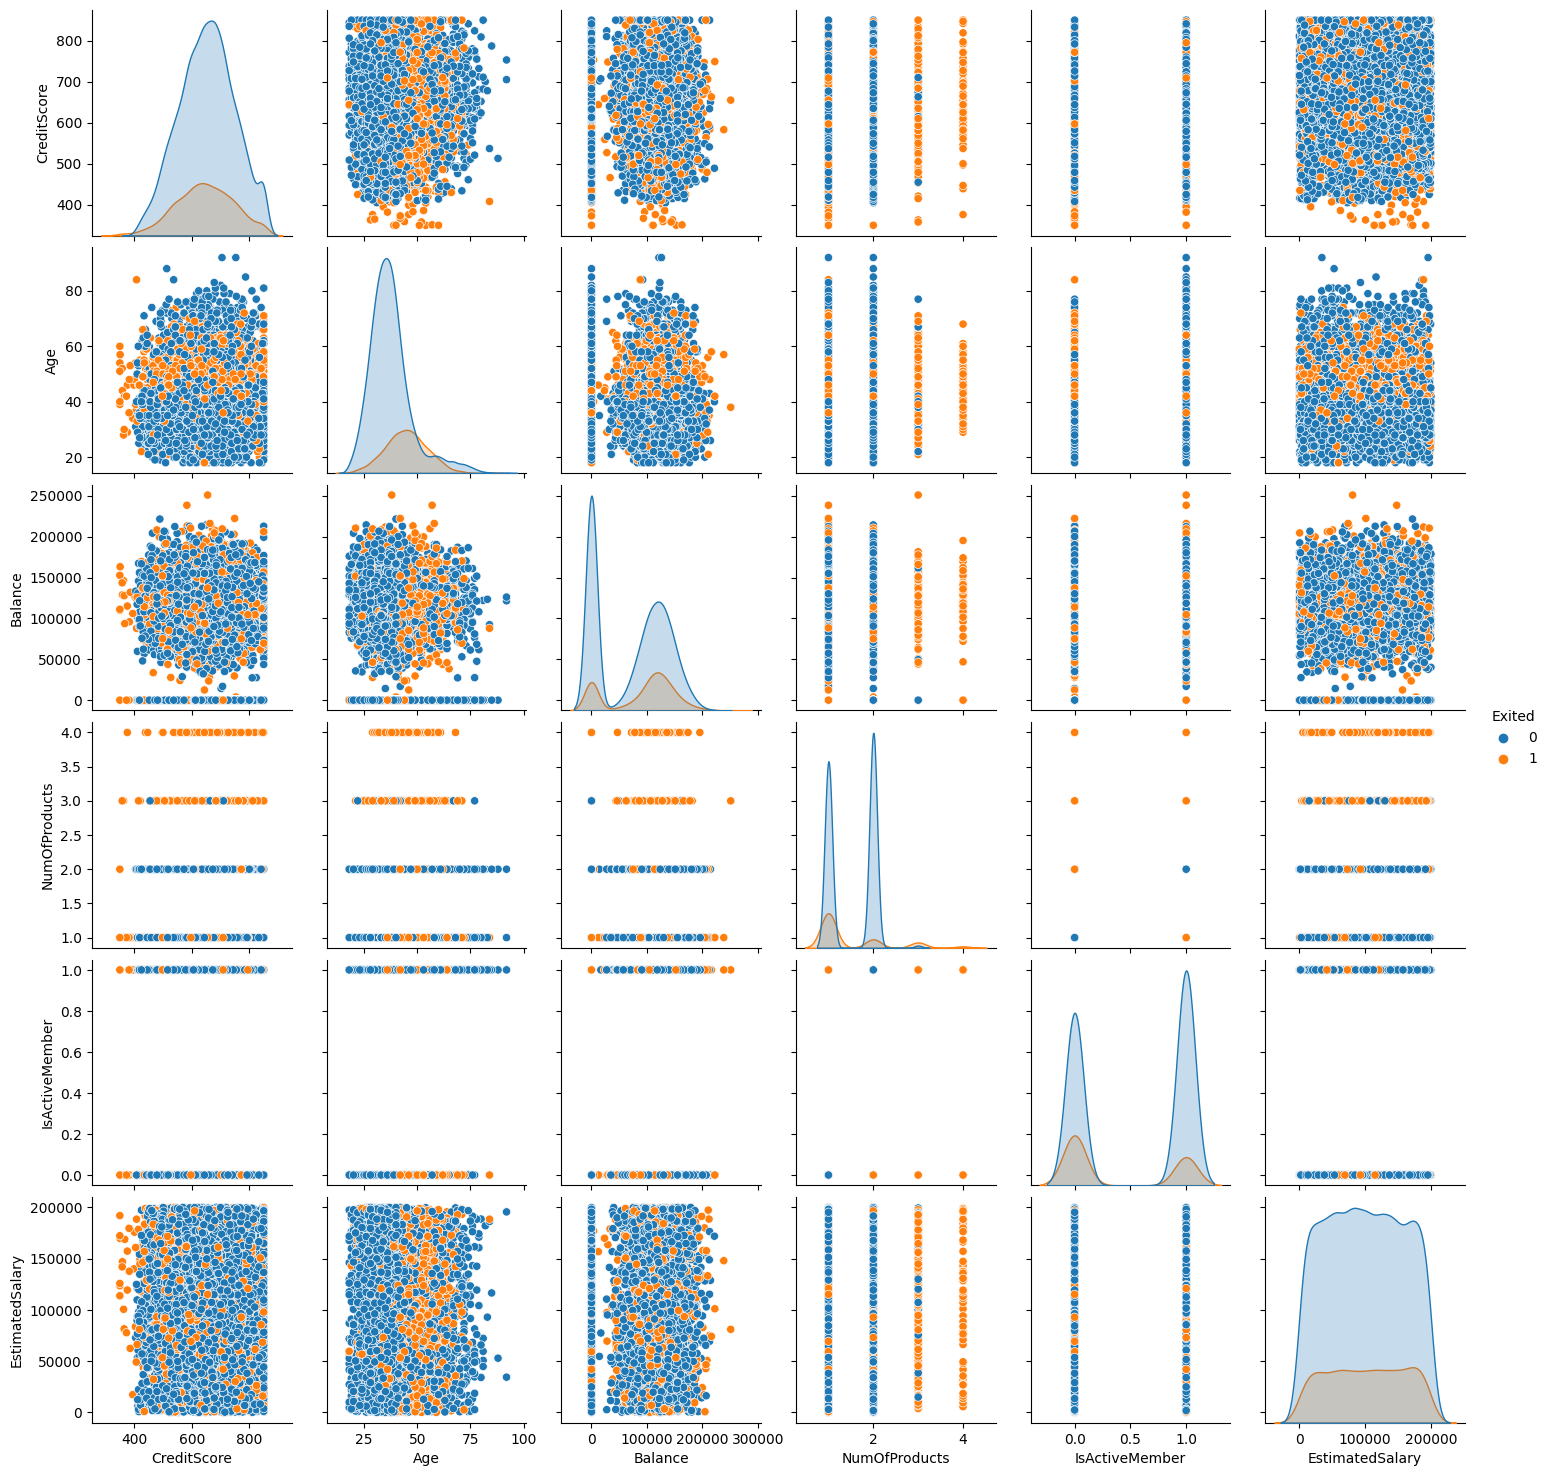

In [ ]:
sns.pairplot(df, hue='Exited', vars=['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary'])
plt.show()


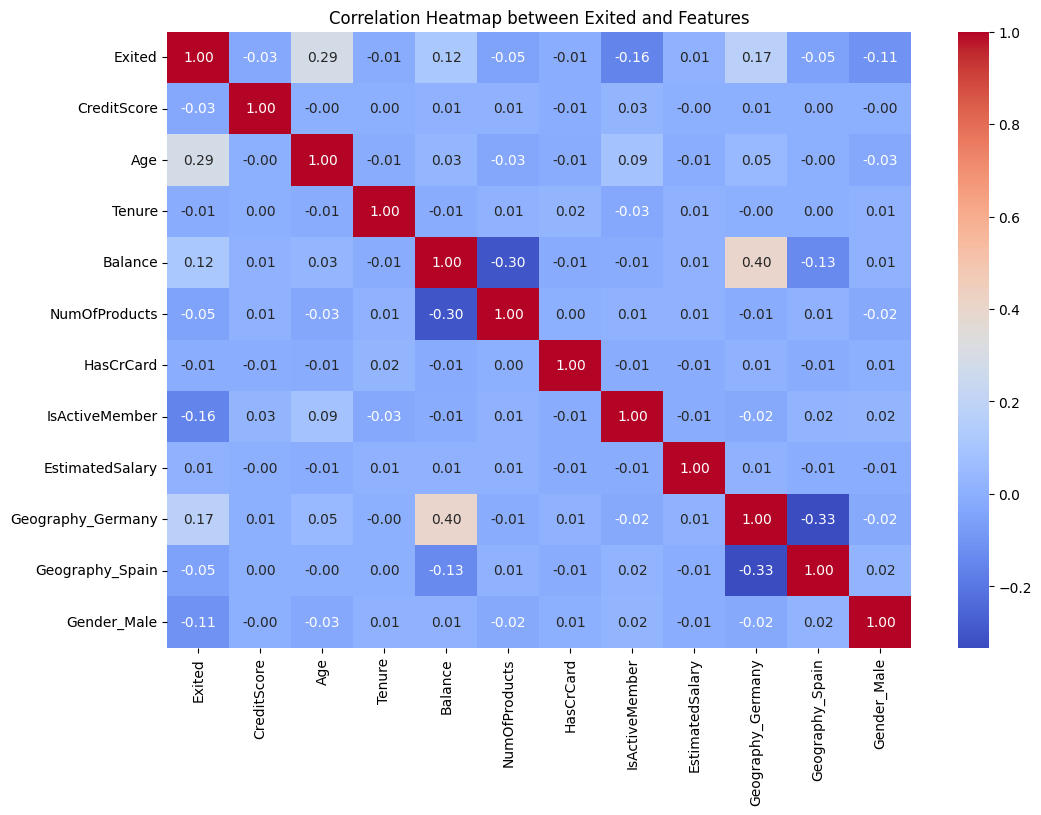

In [ ]:
# Drop non-numeric columns like 'Surname', 'Geography', 'Gender' for simplicity
numeric_features = df.drop(['Exited'], axis=1)

# Combine the target variable with numeric features
combined_df = pd.concat([df['Exited'], numeric_features], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Exited and Features')
plt.show()


By Saad Farah